In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import ticker

# Tải tập dữ liệu chứng khoán
data = pd.read_csv('./Data/CTLT.csv')

In [18]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-07,109.879997,113.489998,109.559998,112.750000,112.750000,750900
1,2022-04-08,112.669998,113.180000,110.419998,110.709999,110.709999,957300
2,2022-04-11,109.580002,110.000000,106.610001,107.050003,107.050003,820400
3,2022-04-12,105.980003,107.099998,99.589996,100.059998,100.059998,1824800
4,2022-04-13,99.769997,101.919998,99.769997,100.879997,100.879997,875500
...,...,...,...,...,...,...,...
246,2023-03-31,65.080002,66.000000,64.510002,65.709999,65.709999,1069900
247,2023-04-03,64.650002,65.059998,62.459999,62.919998,62.919998,1708200
248,2023-04-04,63.000000,63.740002,62.220001,62.250000,62.250000,1435100
249,2023-04-05,61.599998,62.430000,61.060001,61.619999,61.619999,1471200


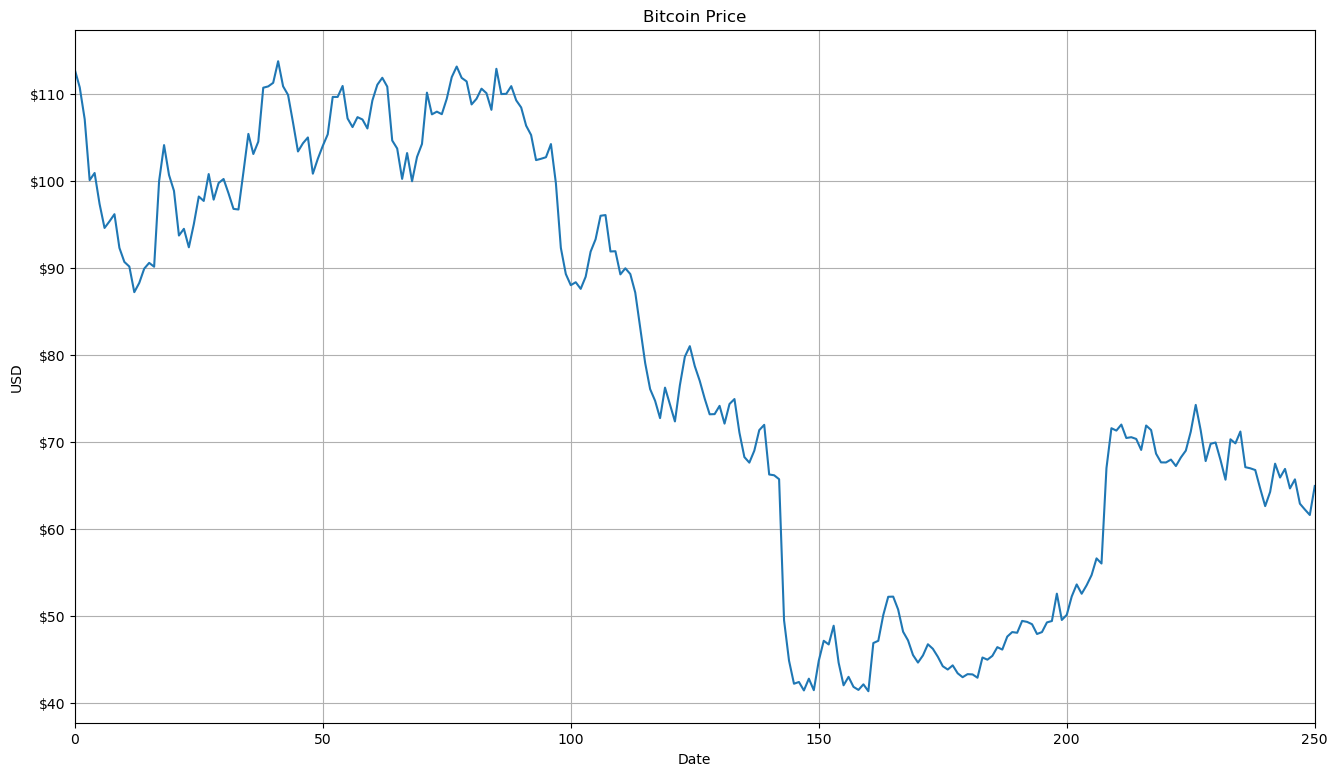

In [29]:

# Thư viện vẽ đồ thị
formatter = ticker.StrMethodFormatter('${x:,.0f}')

title = 'Bitcoin Price'
ylabel = 'USD'
xlabel = 'Date'

ax = data['Close'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)

In [6]:
X = data[['Open', 'High', 'Low', 'Volume']].values
y = data['Close'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')


In [9]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
7/7 [==============================] - 3s 99ms/step - loss: 6644.0161 - val_loss: 6832.1245
Epoch 2/50
7/7 [==============================] - 0s 16ms/step - loss: 6586.6367 - val_loss: 6779.7119
Epoch 3/50
7/7 [==============================] - 0s 15ms/step - loss: 6531.3706 - val_loss: 6728.3813
Epoch 4/50
7/7 [==============================] - 0s 15ms/step - loss: 6477.4902 - val_loss: 6677.0747
Epoch 5/50
7/7 [==============================] - 0s 15ms/step - loss: 6421.1011 - val_loss: 6618.8706
Epoch 6/50
7/7 [==============================] - 0s 14ms/step - loss: 6354.6807 - val_loss: 6547.8237
Epoch 7/50
7/7 [==============================] - 0s 14ms/step - loss: 6276.4785 - val_loss: 6461.6265
Epoch 8/50
7/7 [==============================] - 0s 14ms/step - loss: 6180.0186 - val_loss: 6361.4087
Epoch 9/50
7/7 [==============================] - 0s 15ms/step - loss: 6069.2207 - val_loss: 6240.0723
Epoch 10/50
7/7 [==============================] - 0s 20ms/step - loss: 5

In [10]:
y_pred = model.predict(X_test)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("RMSE:", rmse)


2/2 [==============================] - 0s 6ms/step
RMSE: 37.54322830107388


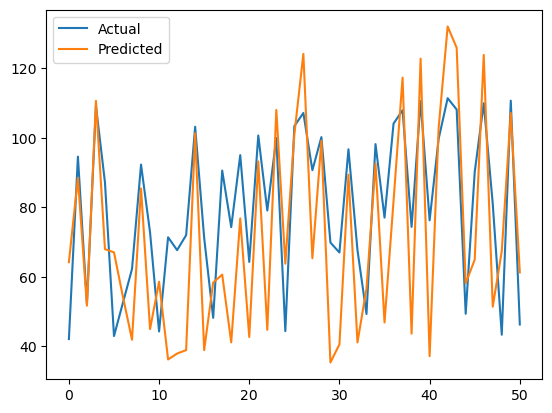

In [11]:
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

Epoch 1/50
7/7 [==============================] - 0s 50ms/step - loss: 420.4351 - val_loss: 432.5422
Epoch 2/50
7/7 [==============================] - 0s 28ms/step - loss: 407.2021 - val_loss: 415.6046
Epoch 3/50
7/7 [==============================] - 0s 24ms/step - loss: 393.4255 - val_loss: 399.4118
Epoch 4/50
7/7 [==============================] - 0s 24ms/step - loss: 380.2345 - val_loss: 383.1394
Epoch 5/50
7/7 [==============================] - 0s 21ms/step - loss: 367.3764 - val_loss: 367.6998
Epoch 6/50
7/7 [==============================] - 0s 37ms/step - loss: 354.4325 - val_loss: 352.4616
Epoch 7/50
7/7 [==============================] - 0s 27ms/step - loss: 341.8408 - val_loss: 337.9357
Epoch 8/50
7/7 [==============================] - 0s 23ms/step - loss: 329.7751 - val_loss: 324.0068
Epoch 9/50
7/7 [==============================] - 0s 29ms/step - loss: 318.1611 - val_loss: 310.7733
Epoch 10/50
7/7 [==============================] - 0s 14ms/step - loss: 307.2472 - val_loss

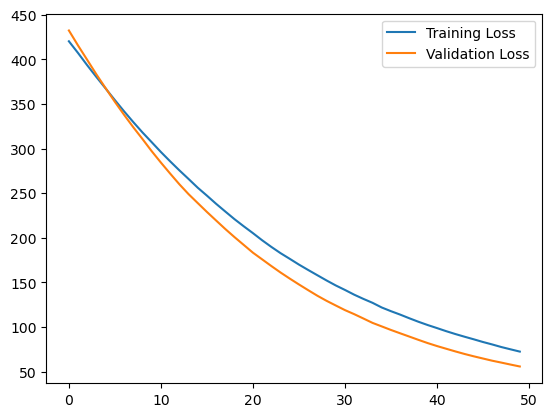

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

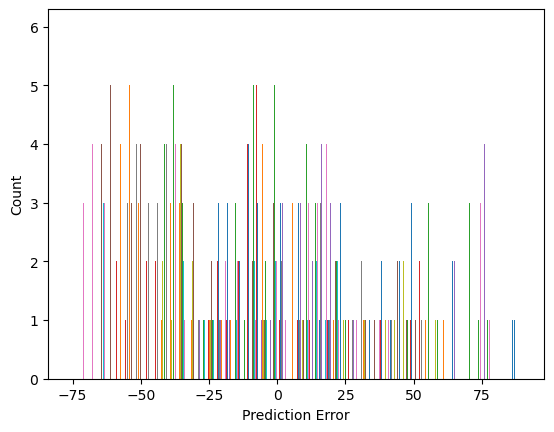

In [13]:
error = y_pred - y_test

plt.hist(error, bins=50)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.show()